In [1]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data.cancer_sim.tumor_dataset_pipeline import TumorGrowthDatasetPipeline
import omegaconf
import numpy as np
import matplotlib.pyplot as plt
from hydra.utils import instantiate, get_original_cwd
config_path = '../config/dataset/tumor_debug.yaml'


c:\Users\mhr_k\miniconda3\envs\R-learner\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args = omegaconf.OmegaConf.load(config_path)
args.dataset.seed = 2026
args.dataset.n_units = 3000
data_pipeline = instantiate(args.dataset)

  0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\mhr_k\OneDrive\Documents\Thesis\Neural-R-Learner\src\data\cancer_sim\simulation.py:324: RuntimeWarning: overflow encountered in exp
  if recovery_rvs[i, t] < np.exp(-cancer_volume[i, t] * TUMOUR_CELL_DENSITY):
100%|██████████| 3000/3000 [00:01<00:00, 2342.00it/s]


(array([21., 24., 45., 38., 36., 56., 38., 30., 45., 51., 49., 45., 57.,
        45., 55., 54., 54., 57., 43., 58., 57., 48., 38., 41., 37., 38.,
        31., 44., 45., 33., 23., 48., 30., 41., 41., 31., 41., 39., 39.,
        46., 33., 45., 44., 36., 32., 34., 41., 31., 42., 47., 37., 16.,
        17., 19., 18., 17., 20., 21., 23., 19., 32., 15., 21., 17., 20.,
        20., 18., 22., 21., 17., 15., 18., 18., 12., 19., 23., 21., 11.,
        12., 16., 24., 14., 15., 14., 23., 13., 16., 20., 18., 23., 21.,
        12., 14., 12., 19., 17., 16., 22., 16., 19.]),
 array([ 0.5248633 ,  1.17380693,  1.82275056,  2.47169419,  3.12063782,
         3.76958145,  4.41852508,  5.06746871,  5.71641234,  6.36535597,
         7.0142996 ,  7.66324323,  8.31218686,  8.96113049,  9.61007412,
        10.25901775, 10.90796138, 11.55690501, 12.20584864, 12.85479227,
        13.5037359 , 14.15267953, 14.80162316, 15.45056679, 16.09951042,
        16.74845405, 17.39739768, 18.04634131, 18.69528494, 19.344228

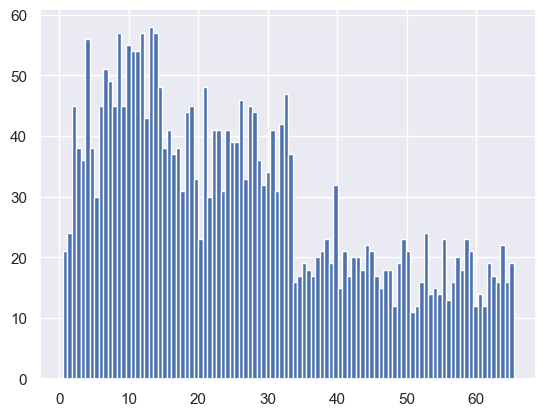

In [3]:
params = data_pipeline.params
initial_vols = params['initial_volumes']
plt.hist(initial_vols, bins=100)

In [4]:
T_intv = np.ones((args.dataset.n_periods, 2))
T_base = np.zeros((args.dataset.n_periods, 2))
y_intv = data_pipeline._simulate_counterfactuals('test', T_intv)
y_base = data_pipeline._simulate_counterfactuals('test', T_base)
te_1 = y_intv - y_base
te_1.shape

treatment_seq: [[1. 1.]
 [1. 1.]
 [1. 1.]]
treatment_seq: [[0. 0.]
 [0. 0.]
 [0. 0.]]


c:\Users\mhr_k\OneDrive\Documents\Thesis\Neural-R-Learner\src\data\cancer_sim\simulation.py:444: RuntimeWarning: overflow encountered in exp
  recovery_idx = np.exp(-ctf_volume[:, t + k] * TUMOUR_CELL_DENSITY) > 0.95


(450, 28)

In [5]:
test_index = data_pipeline.index['test']
ind_de = data_pipeline.compute_individual_true_dynamic_effects(data_pipeline.data['cancer_volume'][test_index])
te_2 = (ind_de * np.expand_dims(np.expand_dims((T_intv - T_base), axis = 0), axis = 0)).sum(axis = (2, 3))
te_2.shape

(450, 28)

In [6]:
((te_1 - te_2)**2 / te_1**2).mean(axis = 0)

array([0.00587236, 0.00587236, 0.00587236, 0.00587236, 0.00587236,
       0.00587236, 0.00587236, 0.00587236, 0.00587236, 0.00587236,
       0.00587236, 0.00587236, 0.00587236, 0.00587236, 0.00587236,
       0.00587236, 0.00587236, 0.00587236, 0.00587236, 0.00587236,
       0.00587236, 0.00587236, 0.00587236, 0.00587236, 0.00587236,
       0.00587236, 0.00587236, 0.00587236])